# analysis example

## Setup

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## Get csv data

In [2]:
df=pd.read_csv(
    'ABCE_atrium_U12_UTF8.csv',  
    skiprows=1,  # skips the first row of the CSV file
    parse_dates=[1]  # converts the values in Column 1 to pandas Timestamp values
)
df

,#,"Time, GMT+01:00","Temp, °C()","RH, %()","Intensity, Lux()",Bad Battery(),Host Connected(),Stopped(),End Of File()
0,1,2013-10-02 06:00:00,19.865,59.728,11.8,NaN,NaN,NaN,NaN
1,2,2013-10-02 06:30:00,19.817,59.781,11.8,NaN,NaN,NaN,NaN
2,3,2013-10-02 07:00:00,19.793,59.747,11.8,NaN,NaN,NaN,NaN
3,4,2013-10-02 07:30:00,19.793,60.899,11.8,NaN,NaN,NaN,NaN
4,5,2013-10-02 08:00:00,19.674,60.910,11.8,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2996,2997,2013-12-03 16:00:00,17.891,42.923,11.8,NaN,NaN,NaN,NaN
2997,2998,2013-12-03 16:30:00,20.936,44.560,11.8,NaN,NaN,NaN,NaN
2998,2999,2013-12-03 16:35:56,NaN,NaN,NaN,NaN,Logged,NaN,NaN
2999,3000,2013-12-03 16:36:04,NaN,NaN,NaN,NaN,Logged,NaN,NaN


## Get metadata

In [3]:
with open('ABCE_atrium_U12_UTF8.csv-metadata.json') as f:
    metadata_table_dict=json.load(f)
metadata_table_dict

{'@context': 'http://www.w3.org/ns/csvw',
 'rdfs:comment': [{'@value': '"Plot Title: 01_10_13 "'}],
 'tableSchema': {'columns': [{'titles': {'und': ['#']},
    'name': 'index',
    'dc:description': 'Integer count of sensor observations, starting at 1.',
    'datatype': 'integer'},
   {'titles': {'und': ['Time, GMT+01:00']},
    'name': 'time',
    'dc:description': 'Date and time of a sensor observation, recorded at time zone Greenwich Mean Time +01:00.',
    'datatype': 'string',
    'rdfs:comment': "The 'Time, GMT+01:00' column contains values such as '10/02/13 06:00:00 AM'. This cannot be represented by the format options available in CSVW. The format of this column approximately corresponds to 'MM/dd/yy HH:mm:ss' plus a 'AM' or 'PM' flag.",
    'schema:variableMeasured': 'Timestamp'},
   {'titles': {'und': ['Temp, °C()']},
    'name': 'temp',
    'dc:description': 'Half hourly air temperature (C).',
    'datatype': 'number',
    'http://purl.org/linked-data/sdmx/2009/attribute#uni

## Combine CSV data and metadata

Combines the CSV data and metadata to a single Pandas Dataframe where some of the metadata information is stored in a MultiIndex on the dataframe columns.


In [4]:
# create new headings
headings=[]

for i in range(len(df.columns)):
    
    col_dict=metadata_table_dict['tableSchema']['columns'][i]
    
    name=col_dict['name']
    
    if isinstance(col_dict['datatype'],dict):
        datatype=col_dict['datatype']['base']
    else:
        datatype=col_dict['datatype']
    
    unit=col_dict.get('schema:unitText','')
    
    variable_measured=col_dict.get('schema:variableMeasured','')
    
    headings.append((name,datatype,unit,variable_measured))

print(headings)

# update dataframe with new headings
df.columns=pd.MultiIndex.from_tuples(
    headings,
    names=('name','datatype','unit','variableMeasured')
)
df.index.name='dataframe_index'
df

[('index', 'integer', '', ''), ('time', 'string', '', 'Timestamp'), ('temp', 'number', 'C', 'Air temperature'), ('rh', 'number', '%', 'Air relative humidity'), ('intensity', 'number', 'Lux', 'Light intensity'), ('bad_battery', 'string', '', ''), ('host_connected', 'string', '', ''), ('stopped', 'string', '', ''), ('end_of_file', 'string', '', '')]


name,index,time,temp,rh,intensity,bad_battery,host_connected,stopped,end_of_file
datatype,integer,string,number,number,number,string,string,string,string
unit,,,C,%,Lux,,,,
variableMeasured,,Timestamp,Air temperature,Air relative humidity,Light intensity,,,,
dataframe_index,,,,,,,,,
0,1,2013-10-02 06:00:00,19.865,59.728,11.8,NaN,NaN,NaN,NaN
1,2,2013-10-02 06:30:00,19.817,59.781,11.8,NaN,NaN,NaN,NaN
2,3,2013-10-02 07:00:00,19.793,59.747,11.8,NaN,NaN,NaN,NaN
3,4,2013-10-02 07:30:00,19.793,60.899,11.8,NaN,NaN,NaN,NaN
4,5,2013-10-02 08:00:00,19.674,60.910,11.8,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...


## Create a plot

This uses the data and the metadata stored in the column headings to create a plot.


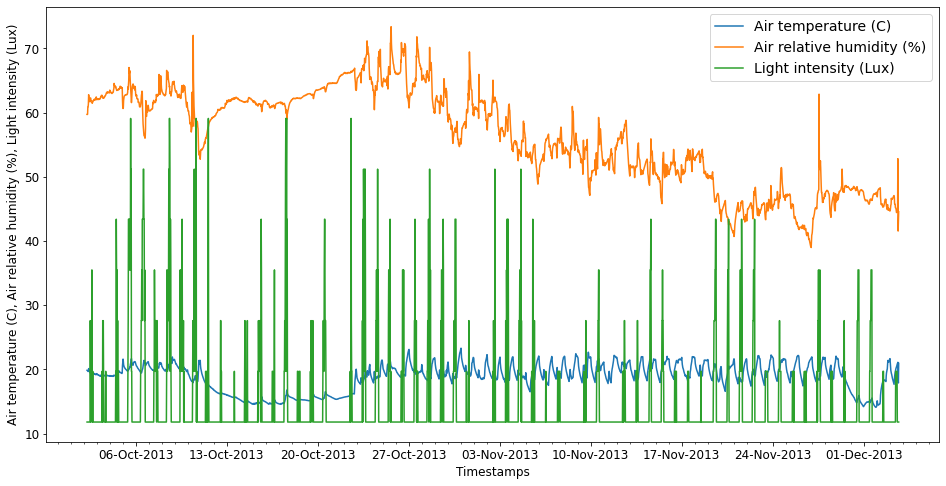

In [5]:
fig,ax=plt.subplots(figsize=(16,8))

ylabels=[]

for col in df.columns:
    
    name,datatype,unit,variableMeasured=col
    
    if name in ['temp','rh','intensity']:
        
        label=f'{variableMeasured} ({unit})'
        ylabels.append(label)
        
        ax.plot(df[df.columns[1]],df[col],label=label)
        
ax.legend(fontsize=14)
ax.set_xlabel('Timestamps')
ax.set_ylabel(', '.join(ylabels))
for item in [ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels(): item.set_fontsize(12)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%Y'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))

plt.show()